# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

C:\Users\legion\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\legion/.pytorch/F_MNIST_data/FashionMNIST\raw



Here we can see one of the images.

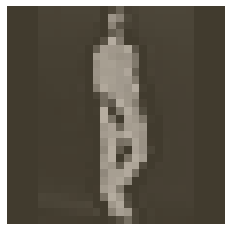

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
import torch.nn as nn
import torch.nn.functional as F

In [37]:
# TODO: Define your network architecture here
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(784,256)
        self.fc2=nn.Linear(256,128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.flatten=nn.Flatten()
        
    def forward(self,x):
        x=self.flatten(x) #x.view(x.shape[0],-1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        #this is better for computations
        x=F.log_softmax(x,dim=1)
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [38]:
# TODO: Create the network, define the criterion and optimizer
model=Model().to(device)
criterion=nn.NLLLoss() #Negative log likely hood loss.
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [39]:
image,label=next(iter(trainloader))
#print(label)
x=model(image)
print(x.shape)# (64,10)

torch.Size([64, 10])


In [40]:
x[0]

tensor([-2.3280, -2.3399, -2.3399, -2.3300, -2.1441, -2.3399, -2.3399, -2.3399,
        -2.3399, -2.2073], grad_fn=<SelectBackward0>)

In [41]:
x[0:2]

tensor([[-2.3280, -2.3399, -2.3399, -2.3300, -2.1441, -2.3399, -2.3399, -2.3399,
         -2.3399, -2.2073],
        [-2.3343, -2.3343, -2.3343, -2.3265, -2.1916, -2.3343, -2.3343, -2.3343,
         -2.3343, -2.1853]], grad_fn=<SliceBackward0>)

In [42]:
#label[0:2]==

In [ ]:
total_steps

In [43]:
torch.argmax(x[0:2],dim=1)

tensor([4, 9])

In [48]:
num_epoch = 5
total_steps = len(trainloader)
Losses = []

for i in range(num_epoch):
    n_correct = 0  # Resetting the correct count at the beginning of each epoch
    n_samples = 0  # Resetting the sample count at the beginning of each epoch
    
    for idx, (data, label) in enumerate(trainloader):
        # Move data and labels to the appropriate device (e.g., CUDA)
        data, label = data.to(device), label.to(device)
        
        # Forward pass
        logs_real = model(data)
        loss = criterion(logs_real, label)
        
        # Start the backward propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss
        Losses.append(loss.item())

        # Adding the accuracy
        n_samples += label.size(0)
        _, predicts = torch.max(logs_real, dim=1)  # We can directly use log probability
        
        n_correct += (predicts == label).sum().item()
        if (idx+1) % 300 == 0:
            print(f"Epoch {i+1}/{num_epoch}, Step [{idx+1}/{total_steps}] Training Loss: {loss.item():.4f}")
            #each idx is a batch from 938 batch  each batch contains 64 image
    # Calculate accuracy for the epoch
    acc = 100.0 * n_correct / n_samples
    
    # Print training progress
    
    print(f'Epoch {i+1}/{num_epoch}, Accuracy of the network so Far: {acc:.2f} %\n')


Epoch 1/5, Step [300/938] Training Loss: 0.4444
Epoch 1/5, Step [600/938] Training Loss: 0.5406
Epoch 1/5, Step [900/938] Training Loss: 0.6158
Epoch 1/5, Accuracy of the network so Far: 81.58 %

Epoch 2/5, Step [300/938] Training Loss: 0.4408
Epoch 2/5, Step [600/938] Training Loss: 0.5310
Epoch 2/5, Step [900/938] Training Loss: 0.3820
Epoch 2/5, Accuracy of the network so Far: 81.72 %

Epoch 3/5, Step [300/938] Training Loss: 0.3531
Epoch 3/5, Step [600/938] Training Loss: 0.3949
Epoch 3/5, Step [900/938] Training Loss: 0.4235
Epoch 3/5, Accuracy of the network so Far: 81.78 %

Epoch 4/5, Step [300/938] Training Loss: 0.3715
Epoch 4/5, Step [600/938] Training Loss: 0.4976
Epoch 4/5, Step [900/938] Training Loss: 0.7042
Epoch 4/5, Accuracy of the network so Far: 82.05 %

Epoch 5/5, Step [300/938] Training Loss: 0.5061
Epoch 5/5, Step [600/938] Training Loss: 0.5829
Epoch 5/5, Step [900/938] Training Loss: 0.5514
Epoch 5/5, Accuracy of the network so Far: 82.25 %



In [49]:
print('Finished Training')

PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Finished Training


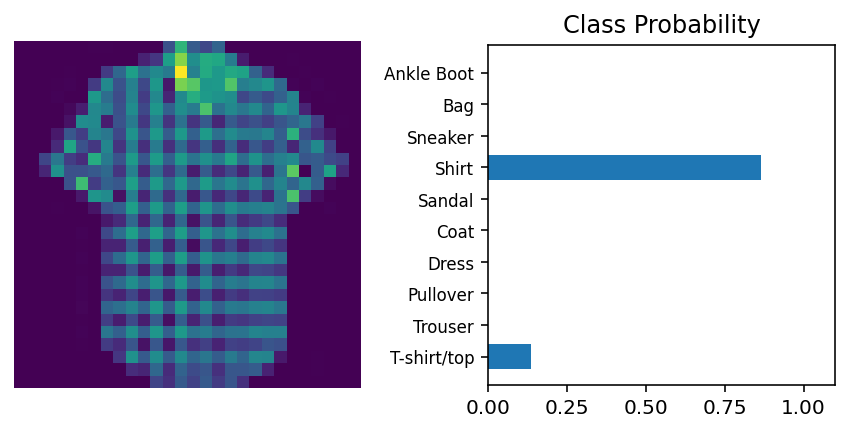

In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')